In [ ]:
#Histogram Equalization is a method of contrast adjustament based on the image's hostogram.
#Applying histogram equalization will reduce the color depth (shades of gray)
#maxValue is white, minValue is dark
#we get much more contrast in the image with hist.eq.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rainbow = cv2.imread('../../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [3]:
img = rainbow

In [4]:
img.shape

(550, 413, 3)

In [5]:
img.shape[:2]

(550, 413)

In [8]:
mask = np.zeros(img.shape[:2],np.uint8)

In [13]:
#plt.imshow(mask, cmap='gray')
mask[300:400,100:400] = 255

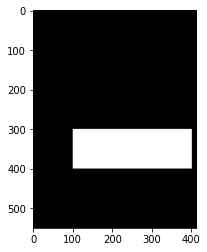

In [14]:
plt.imshow(mask, cmap='gray')

In [ ]:
#plt.imshow(show_rainbow)

In [15]:
masked_img =cv2.bitwise_and(img, img, mask=mask)

In [16]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow, mask=mask)

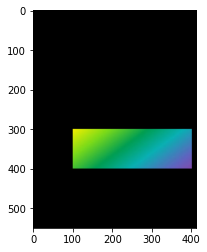

In [24]:
plt.imshow(show_masked_img) 

In [27]:
# B G R
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256],ranges=[0,256])

In [28]:
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

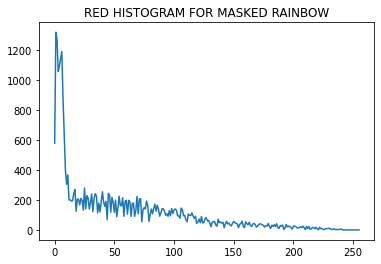

In [29]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

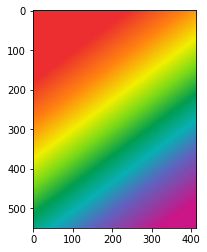

In [33]:
plt.imshow(show_rainbow)

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

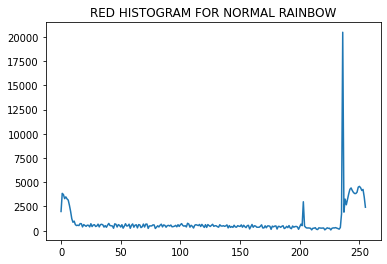

In [34]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')

In [ ]:
#### HISTOGRAM EQUALIZATION PART 3 ####

In [43]:
gorilla = cv2.imread('../../DATA/gorilla.jpg',0)

In [44]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

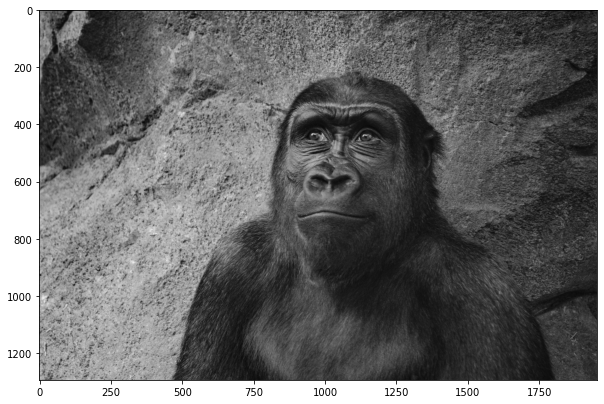

In [45]:
display_img(gorilla, cmap='gray')

In [46]:
gorilla.shape

(1295, 1955)

In [47]:
#channels=[0] we have onely 1 channel, grey
hist_values= cv2.calcHist([gorilla], channels=[0], mask=None,histSize=[256],ranges=[0,256])

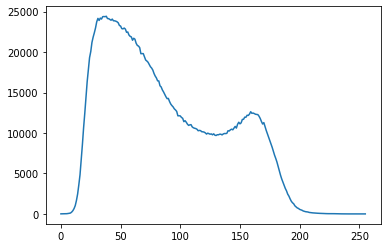

In [48]:
plt.plot(hist_values)

In [50]:
eq_gorilla = cv2.equalizeHist(gorilla)

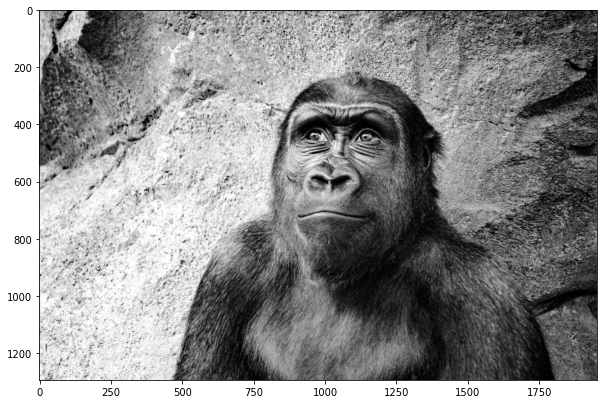

In [52]:
display_img(eq_gorilla,cmap='gray')

In [53]:
hist_values_eq= cv2.calcHist([eq_gorilla], channels=[0], mask=None,histSize=[256],ranges=[0,256])

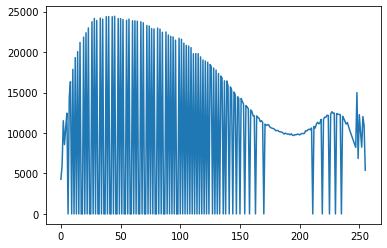

In [54]:
plt.plot(hist_values_eq)

In [55]:
color_gorilla = cv2.imread('../../DATA/gorilla.jpg')

In [57]:
#convert color from BRG to RGB
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

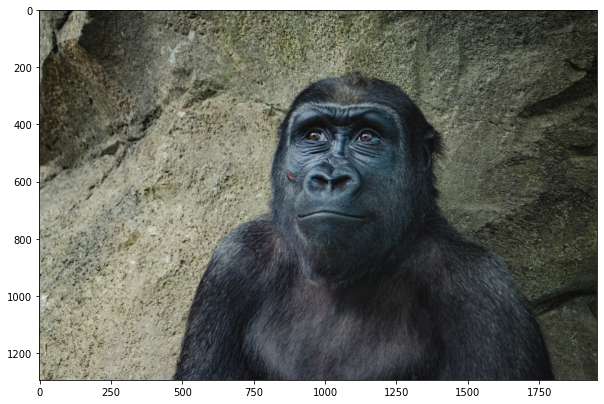

In [60]:
display_img(show_gorilla)

In [61]:
#Convert color image HSV
hsv= cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

In [62]:
hsv[:,:,2].max()

255

In [63]:
hsv[:,:,2].min()

0

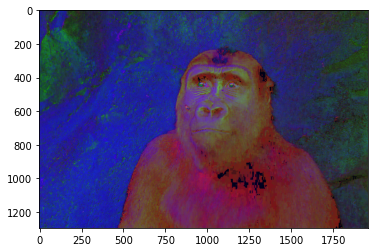

In [66]:
plt.imshow(hsv)

In [67]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [74]:
#HSV to RGB
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

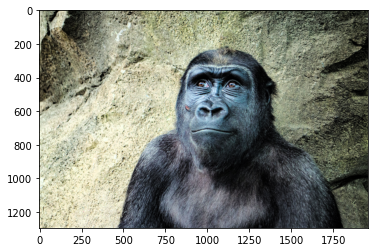

In [75]:
plt.imshow(eq_color_gorilla)

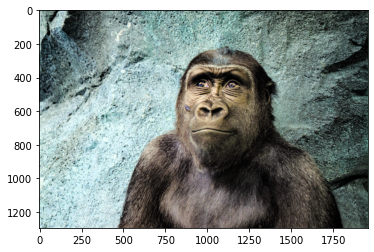

In [76]:
#HSV to BGR
eq_BGR_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(eq_BGR_gorilla)